<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Travis!

I'm happy to review your project today 🙌

My name is **Justino Imbert** ([this](https://hub.tripleten.com/u/8714ff16 ) is my Hub profile) and today I'll be reviewing your project!


You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>   


<div class="alert alert-block alert-info">
<b>Reviewer's comment v1:</b> </a>

Amazing job with this submission! I'm approving this project!

Congrats and I wish you the best of luck in the following sprints!

Looking forward to reviewing your future work!
    
</div>


# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

from IPython.display import display

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [2]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [3]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
2497,1,19.0,39300.0,0,0
3982,0,34.0,40600.0,0,0
4043,1,29.0,48100.0,2,0
4178,1,37.0,54200.0,2,0
2163,1,29.0,47500.0,0,0
1454,1,55.0,33100.0,1,3
1201,0,18.0,35400.0,0,0
3094,1,31.0,47300.0,3,0
3392,0,25.0,48100.0,0,0
3744,0,28.0,42500.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:
df['age'] = df['age'].astype(int)

In [7]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [8]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


## Data Quality Check (Descriptive Statistics)

### Feature-by-Feature Assessment

- **Gender**
  - Encoded as 0/1, evenly distributed (mean ≈ 0.499, std ≈ 0.5).
  - Min = 0, Max = 1 → values are valid, no anomalies.

- **Age**
  - Range: 18 to 65 years old.
  - Mean ≈ 31, std ≈ 8.4 → realistic for an insurance dataset.
  - No extreme outliers (values are within expected adult age range).

- **Income**
  - Range: \$5,300 to \$79,000.
  - Mean ≈ \$39,916, std ≈ \$9,900.
  - Distribution seems reasonable — no negative or implausibly high values.

- **Family Members**
  - Range: 0 to 6.
  - Mean ≈ 1.19, std ≈ 1.09.
  - Values are plausible (no negatives, no extreme family sizes).

- **Insurance Benefits**
  - Range: 0 to 5.
  - Mean ≈ 0.148, std ≈ 0.463.
  - Highly skewed: most customers have **0 benefits** (median = 0, 75% = 0).
  - A small minority received up to 5 benefits.

---

### Observations
- **Class imbalance in target (`insurance_benefits`)**:  
  Most customers have 0 benefits, which means classification tasks will need careful handling (e.g., F1 score, not just accuracy).
- **No missing values**: Count = 5000 for all columns.
- **No extreme outliers**: All ranges look plausible for the context.

---

### Conclusion
Yes, everything looks okay:
- The dataset is clean, with no missing values or invalid entries.  
- The only notable issue is **imbalance in the target variable** (insurance benefits), which is expected and should be addressed in modeling.

In [9]:
df['insurance_benefits'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: insurance_benefits, dtype: int64

In [10]:
# Display the normalized value counts of the target variable (insurance_benefits).
# This shows the proportion of customers by number of benefits received.
display(df['insurance_benefits'].value_counts(normalize=True))

0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: insurance_benefits, dtype: float64

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Data loading and inspection are looking awesome!

</div>



## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

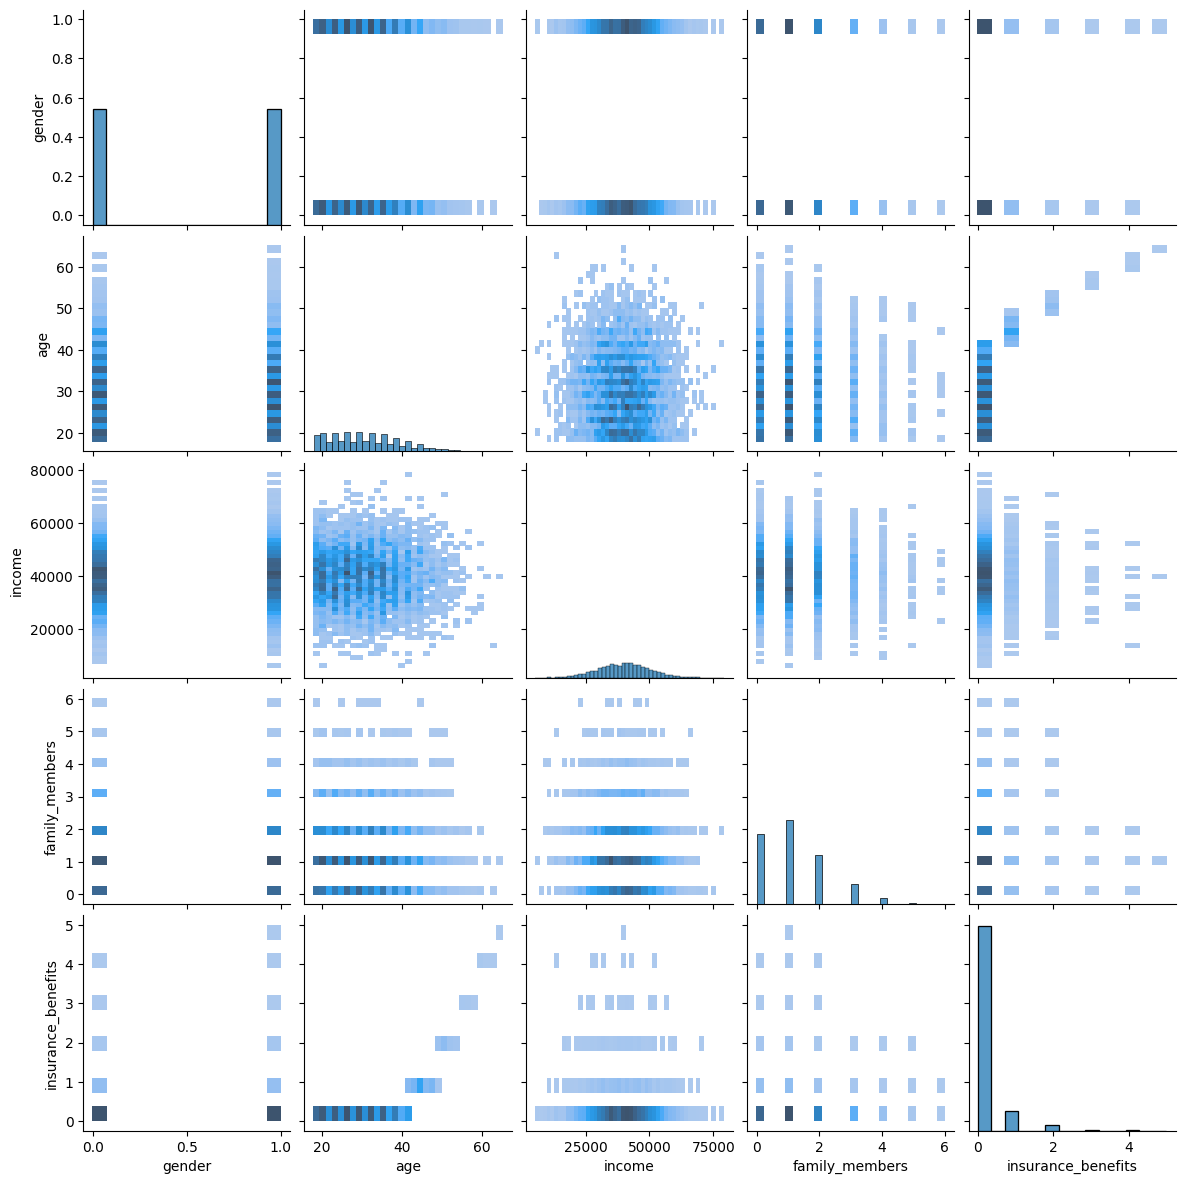

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

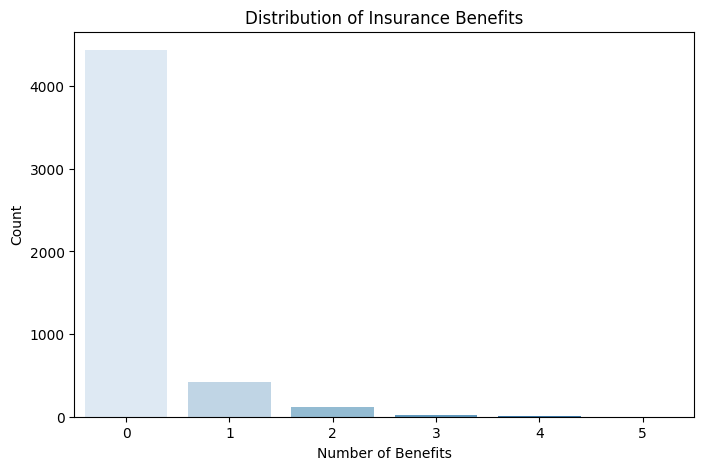

Normalized value counts:
0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: insurance_benefits, dtype: float64


In [12]:
# Target Distribution Analysis
# Plot the distribution of insurance benefits received
# This helps visualize class imbalance and skew in the target variable

plt.figure(figsize=(8, 5))
sns.countplot(x='insurance_benefits', data=df, palette='Blues')
plt.title('Distribution of Insurance Benefits')
plt.xlabel('Number of Benefits')
plt.ylabel('Count')
plt.show()

# Display normalized value counts for precise proportions
print("Normalized value counts:")
print(df['insurance_benefits'].value_counts(normalize=True))

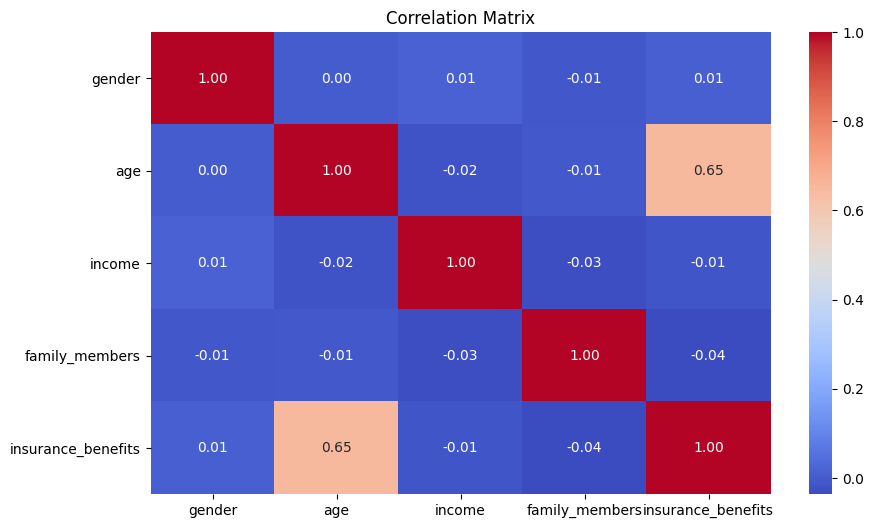

In [13]:
# Correlation Matrix
# Compute and visualize the correlation matrix
# This helps identify linear relationships between features and the target

plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

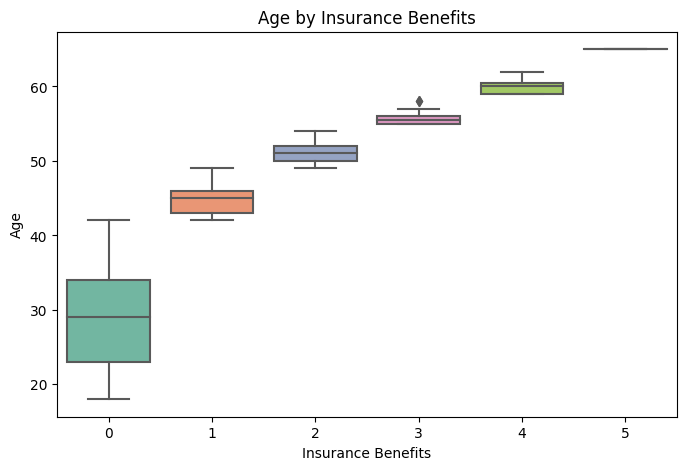

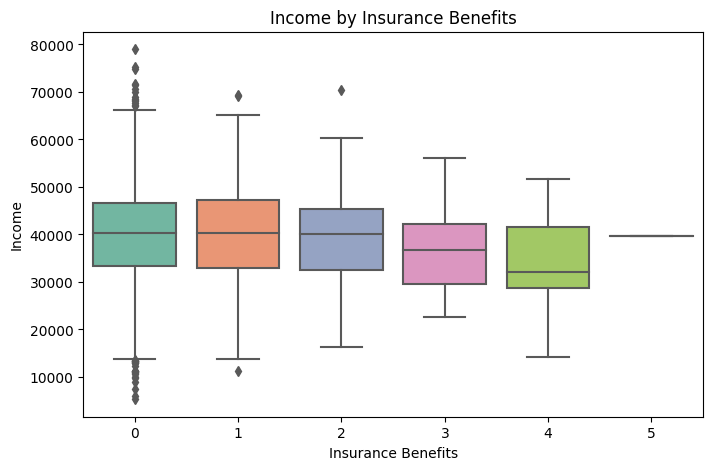

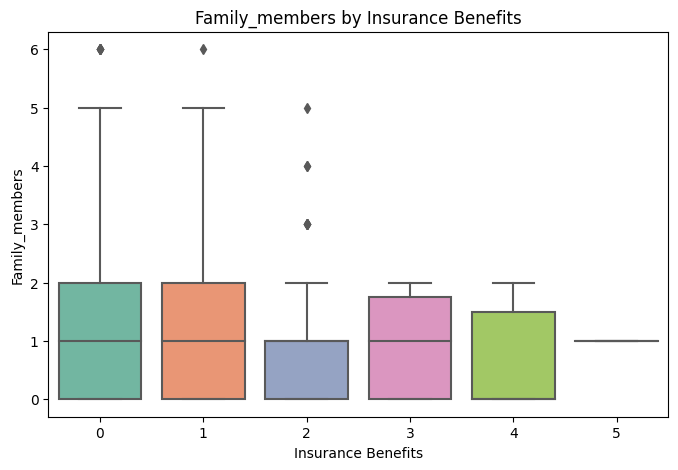

In [14]:
# Boxplots for Outlier Detection
# Boxplots grouped by insurance benefit levels
# Useful for spotting outliers and understanding feature distributions across target classes

features = ['age', 'income', 'family_members']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='insurance_benefits', y=feature, data=df, palette='Set2')
    plt.title(f'{feature.capitalize()} by Insurance Benefits')
    plt.xlabel('Insurance Benefits')
    plt.ylabel(feature.capitalize())
    plt.show()

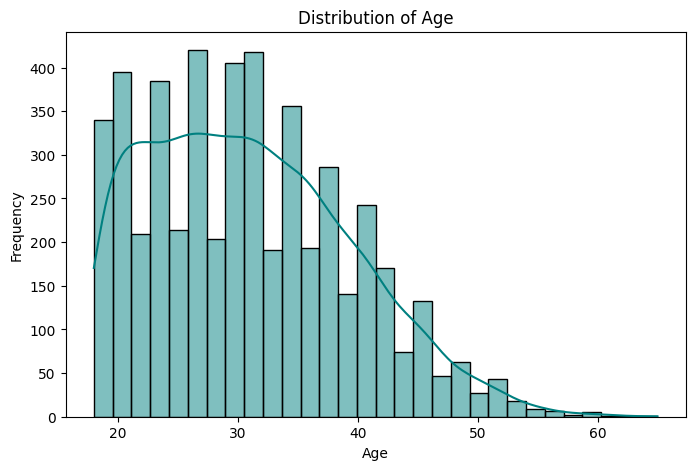

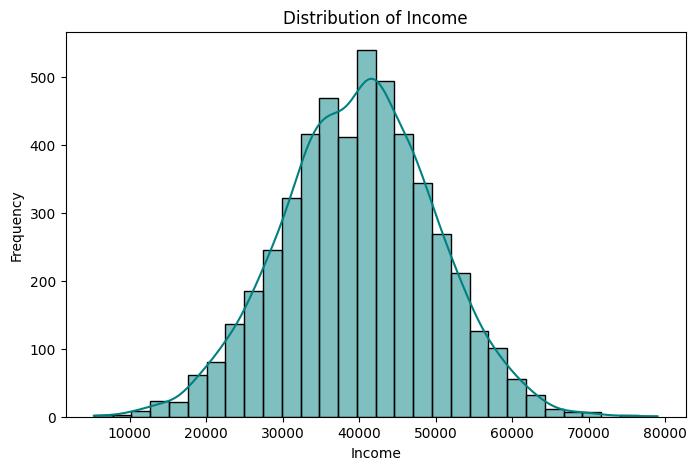

In [15]:
# Histograms and KDE Plots
# Histograms and KDE plots for continuous features
# Helps assess distribution shape (normal, skewed, multimodal)

for feature in ['age', 'income']:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()

In [16]:
# Feature importance from correlation with target
feature_importance = abs(df[['gender', 'age', 'income', 'family_members']].corrwith(df['insurance_benefits']))
print("Feature importance ranking:")
print(feature_importance.sort_values(ascending=False))

Feature importance ranking:
age               0.651030
family_members    0.036290
income            0.014963
gender            0.010140
dtype: float64


In [17]:
# Group-Based Aggregations
# Group by insurance benefits and compute summary statistics
# Reveals trends and averages across benefit levels

grouped = df.groupby('insurance_benefits')[['age', 'income', 'family_members']].agg(['mean', 'median', 'count'])
display(grouped)

age                     income                 \
                         mean median count          mean   median count   
insurance_benefits                                                        
0                   28.970694   29.0  4436  39924.752029  40200.0  4436   
1                   44.706856   45.0   423  40260.520095  40400.0   423   
2                   50.860870   51.0   115  39035.652174  40000.0   115   
3                   55.833333   55.5    18  37677.777778  36800.0    18   
4                   60.000000   60.0     7  34057.142857  32100.0     7   
5                   65.000000   65.0     1  39700.000000  39700.0     1   

                   family_members               
                             mean median count  
insurance_benefits                              
0                        1.205816      1  4436  
1                        1.139480      1   423  
2                        1.017391      1   115  
3                        0.944444      1    18  
4                        0.714286      0     7  
5                        1.000000      1     1

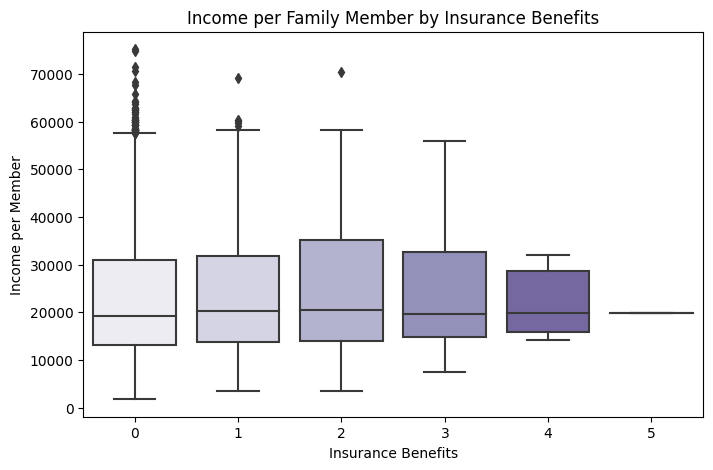

In [18]:
# Feature Interactions
# Create a derived feature: income per family member
# Helps explore whether income burden per person affects benefit receipt

df['income_per_member'] = df['income'] / (df['family_members'] + 1)  # avoid division by zero

plt.figure(figsize=(8, 5))
sns.boxplot(x='insurance_benefits', y='income_per_member', data=df, palette='Purples')
plt.title('Income per Family Member by Insurance Benefits')
plt.xlabel('Insurance Benefits')
plt.ylabel('Income per Member')
plt.show()

In [19]:
# Missing Value Check
# Check for missing values across all columns
# Already verified, but good to document explicitly

missing = df.isnull().sum()
print("Missing values per column:")
print(missing)

Missing values per column:
gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
income_per_member     0
dtype: int64


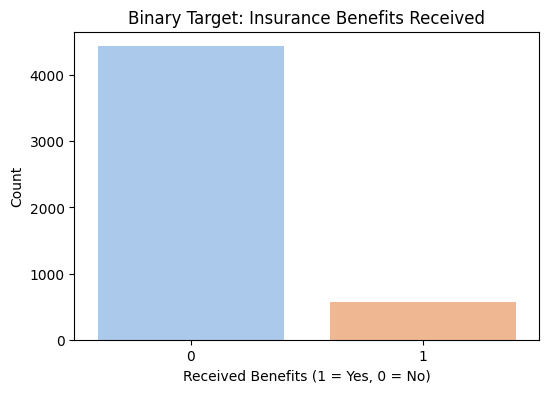

In [20]:
# Class Imbalance Visualization
# Visualize binary target for classification (benefits received or not)
# Important for Task 2 modeling

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

plt.figure(figsize=(6, 4))
sns.countplot(x='insurance_benefits_received', data=df, palette='pastel')
plt.title('Binary Target: Insurance Benefits Received')
plt.xlabel('Received Benefits (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

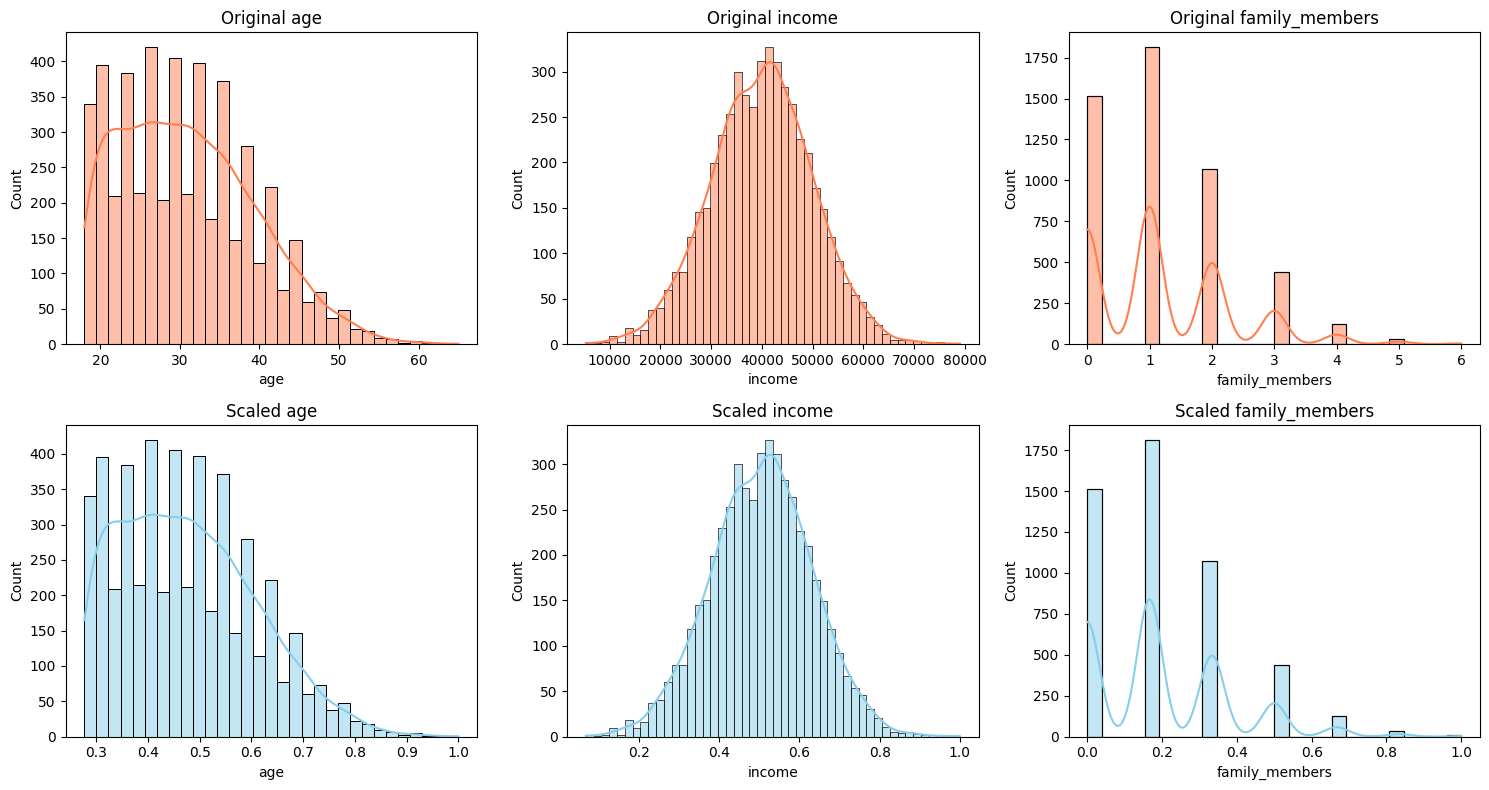

In [21]:
# Scaling Impact Preview
# Compare distributions before and after scaling
# Useful for understanding how scaling affects feature ranges

scaler = MaxAbsScaler()
scaled = pd.DataFrame(scaler.fit_transform(df[['age', 'income', 'family_members']]), 
                      columns=['age', 'income', 'family_members'])

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, feature in enumerate(['age', 'income', 'family_members']):
    sns.histplot(df[feature], ax=axes[0, i], kde=True, color='coral')
    axes[0, i].set_title(f'Original {feature}')
    
    sns.histplot(scaled[feature], ax=axes[1, i], kde=True, color='skyblue')
    axes[1, i].set_title(f'Scaled {feature}')

plt.tight_layout()
plt.show()

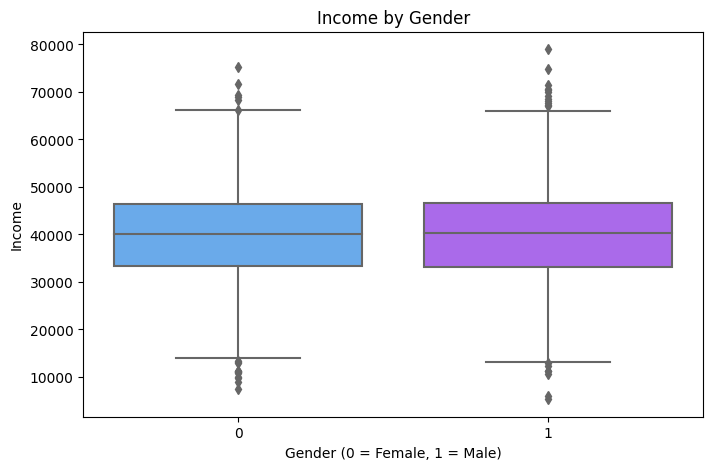

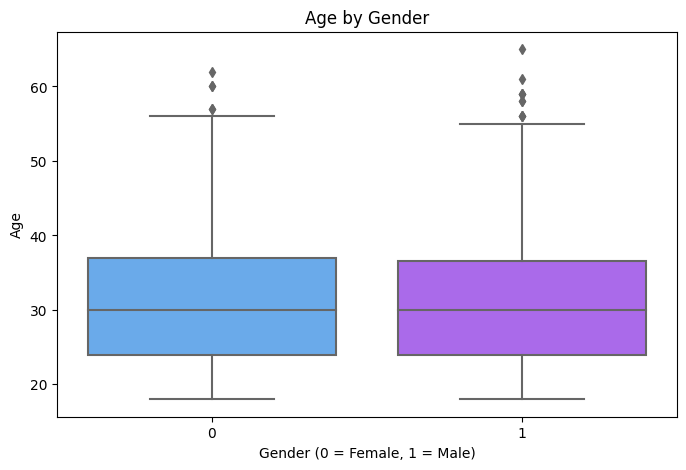

In [22]:
# Gender-Based Comparisons
# Compare income and age distributions across gender
# Helps detect potential disparities or patterns

for feature in ['income', 'age']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='gender', y=feature, data=df, palette='cool')
    plt.title(f'{feature.capitalize()} by Gender')
    plt.xlabel('Gender (0 = Female, 1 = Male)')
    plt.ylabel(feature.capitalize())
    plt.show()

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Your EDA is looking amazing! The plots are great and add a lot to the analysis.

</div>



# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [23]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [24]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = sklearn.neighbors.NearestNeighbors(
        n_neighbors=k, 
        metric=metric
    ).fit(df[feature_names].to_numpy()) # <your code here> 
    
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Nearest neighbors function is looking great!

</div>



Scaling the data.

In [25]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [26]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits,income_per_member,insurance_benefits_received
794,0.0,0.400000,0.516456,0.666667,0,8160.0,0
1615,0.0,0.276923,0.521519,0.000000,0,41200.0,0
260,1.0,0.646154,0.591139,0.000000,1,46700.0,1
4360,1.0,0.415385,0.946835,0.000000,0,74800.0,0
1643,0.0,0.323077,0.665823,0.166667,0,26300.0,0


Now, let's get similar records for a given one for every combination

In [27]:
# Run kNN on the unscaled dataset using Euclidean distance.
print("Unscaled + Euclidean")
display(get_knn(df, n=0, k=5, metric='euclidean'))

Unscaled + Euclidean


,gender,age,income,family_members,insurance_benefits,income_per_member,insurance_benefits_received,distance
0,1,41,49600.0,1,0,24800.000000,0,0.000000
2022,1,41,49600.0,0,0,49600.000000,0,1.000000
1225,0,42,49600.0,0,1,49600.000000,1,1.732051
4031,1,44,49600.0,2,1,16533.333333,1,3.162278
3424,0,38,49600.0,0,0,49600.000000,0,3.316625


In [28]:
# Run kNN on the unscaled dataset using Manhattan distance.
print("Unscaled + Manhattan")
display(get_knn(df, n=0, k=5, metric='manhattan'))

Unscaled + Manhattan


,gender,age,income,family_members,insurance_benefits,income_per_member,insurance_benefits_received,distance
0,1,41,49600.0,1,0,24800.000000,0,0.0
2022,1,41,49600.0,0,0,49600.000000,0,1.0
1225,0,42,49600.0,0,1,49600.000000,1,3.0
4031,1,44,49600.0,2,1,16533.333333,1,4.0
3424,0,38,49600.0,0,0,49600.000000,0,5.0


In [29]:
# Run kNN on the scaled dataset using Euclidean distance.
print("Scaled + Euclidean")
display(get_knn(df_scaled, n=0, k=5, metric='euclidean'))

Scaled + Euclidean


,gender,age,income,family_members,insurance_benefits,income_per_member,insurance_benefits_received,distance
0,1.0,0.630769,0.627848,0.166667,0,24800.0,0,0.000000
2689,1.0,0.630769,0.634177,0.166667,0,25050.0,0,0.006329
133,1.0,0.615385,0.636709,0.166667,0,25150.0,0,0.017754
4869,1.0,0.646154,0.637975,0.166667,1,25200.0,1,0.018418
3275,1.0,0.646154,0.651899,0.166667,1,25750.0,1,0.028550


In [30]:
# Run kNN on the scaled dataset using Manhattan distance.
print("Scaled + Manhattan")
display(get_knn(df_scaled, n=0, k=5, metric='manhattan'))

Scaled + Manhattan


,gender,age,income,family_members,insurance_benefits,income_per_member,insurance_benefits_received,distance
0,1.0,0.630769,0.627848,0.166667,0,24800.0,0,0.000000
2689,1.0,0.630769,0.634177,0.166667,0,25050.0,0,0.006329
133,1.0,0.615385,0.636709,0.166667,0,25150.0,0,0.024245
4869,1.0,0.646154,0.637975,0.166667,1,25200.0,1,0.025511
3365,1.0,0.630769,0.596203,0.166667,0,23550.0,0,0.031646


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Yes. Without scaling, features with larger numeric ranges (like income) dominate the distance calculation.

As a result, neighbors are chosen mostly based on income rather than age, family size, or gender.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

The Manhattan metric produces results broadly similar to Euclidean, but differences appear in ordering.

Scaling reduces these differences further, making Manhattan and Euclidean neighbors more consistent.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Task 1 looking great! Nice job answering these questions!

</div>



# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [31]:
# calculate the target
# Target is binary: 1 if insurance_benefits > 0, else 0
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [32]:
# check for the class imbalance with value_counts()
# This shows how many customers received benefits vs. did not
print(df['insurance_benefits_received'].value_counts())
print(df['insurance_benefits_received'].value_counts(normalize=True))  # relative proportions

0    4436
1     564
Name: insurance_benefits_received, dtype: int64
0    0.8872
1    0.1128
Name: insurance_benefits_received, dtype: float64


In [33]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [34]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [35]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:
    print(f'The probability: {P:.2f}')
    
    # generate predictions from the random model
    y_pred_rnd = rnd_model_predict(P, size=len(df))
    
    # evaluate against the true target
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



In [36]:
# Now build and evaluate KNN classifiers for k=1..10
# Compare performance on both unscaled and scaled data

# Define feature matrix (X) and target vector (y)
# X contains the customer attributes: gender, age, income, family_members
# y is the binary target: whether the customer received any insurance benefits (1) or not (0)
X = df[feature_names]
y = df['insurance_benefits_received']

# Split into train/test sets (70/30 split)
# random_state ensures reproducibility
# stratify=y keeps the class distribution balanced between train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Perform the same split for the scaled dataset
# Scaling ensures that features with larger numeric ranges (like income) do not dominate distance calculations
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    df_scaled[feature_names], y, test_size=0.3, random_state=42, stratify=y
)

In [37]:
# Evaluate KNN classifier on unscaled data
print("KNN Classifier Results (Unscaled Data)")
for k in range(1, 11):  # loop over k values from 1 to 10
    # Initialize KNN classifier with Euclidean distance
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # Fit the model on training data
    knn.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = knn.predict(X_test)
    
    # Print current k value
    print(f"k={k}")
    
    # Evaluate predictions using F1 score and confusion matrix
    eval_classifier(y_test, y_pred)
    print()

KNN Classifier Results (Unscaled Data)
k=1
F1: 0.60
Confusion Matrix
[[0.87066667 0.01666667]
 [0.05733333 0.05533333]]

k=2
F1: 0.33
Confusion Matrix
[[0.88       0.00733333]
 [0.08866667 0.024     ]]

k=3
F1: 0.34
Confusion Matrix
[[0.87466667 0.01266667]
 [0.08666667 0.026     ]]

k=4
F1: 0.22
Confusion Matrix
[[8.86666667e-01 6.66666667e-04]
 [9.86666667e-02 1.40000000e-02]]

k=5
F1: 0.26
Confusion Matrix
[[0.88266667 0.00466667]
 [0.09533333 0.01733333]]

k=6
F1: 0.09
Confusion Matrix
[[0.88733333 0.        ]
 [0.10733333 0.00533333]]

k=7
F1: 0.10
Confusion Matrix
[[0.886      0.00133333]
 [0.10666667 0.006     ]]

k=8
F1: 0.03
Confusion Matrix
[[0.88733333 0.        ]
 [0.11066667 0.002     ]]

k=9
F1: 0.05
Confusion Matrix
[[8.86666667e-01 6.66666667e-04]
 [1.10000000e-01 2.66666667e-03]]

k=10
F1: 0.02
Confusion Matrix
[[0.88733333 0.        ]
 [0.11133333 0.00133333]]



In [38]:
# Evaluate KNN classifier on scaled data
print("KNN Classifier Results (Scaled Data)")
for k in range(1, 10+1):  # loop over k values from 1 to 10
    # Initialize KNN classifier with Euclidean distance
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # Fit the model on scaled training data
    knn.fit(X_train_scaled, y_train)
    
    # Predict on scaled test data
    y_pred = knn.predict(X_test_scaled)
    
    # Print current k value
    print(f"k={k}")
    
    # Evaluate predictions using F1 score and confusion matrix
    eval_classifier(y_test, y_pred)
    print()

KNN Classifier Results (Scaled Data)
k=1
F1: 0.92
Confusion Matrix
[[0.87933333 0.008     ]
 [0.00933333 0.10333333]]

k=2
F1: 0.91
Confusion Matrix
[[0.88533333 0.002     ]
 [0.016      0.09666667]]

k=3
F1: 0.95
Confusion Matrix
[[0.88466667 0.00266667]
 [0.00933333 0.10333333]]

k=4
F1: 0.90
Confusion Matrix
[[8.86666667e-01 6.66666667e-04]
 [2.06666667e-02 9.20000000e-02]]

k=5
F1: 0.92
Confusion Matrix
[[0.88466667 0.00266667]
 [0.01533333 0.09733333]]

k=6
F1: 0.89
Confusion Matrix
[[8.86666667e-01 6.66666667e-04]
 [2.13333333e-02 9.13333333e-02]]

k=7
F1: 0.93
Confusion Matrix
[[8.86666667e-01 6.66666667e-04]
 [1.46666667e-02 9.80000000e-02]]

k=8
F1: 0.90
Confusion Matrix
[[8.86666667e-01 6.66666667e-04]
 [1.93333333e-02 9.33333333e-02]]

k=9
F1: 0.93
Confusion Matrix
[[8.86666667e-01 6.66666667e-04]
 [1.40000000e-02 9.86666667e-02]]

k=10
F1: 0.90
Confusion Matrix
[[0.88733333 0.        ]
 [0.02       0.09266667]]



<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Nice job testing knn with unscaled and scaled data!

Looking amazing!

</div>



# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [39]:
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # adding the unities (bias term)
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        
        # closed-form solution: w = (X^T X)^(-1) X^T y
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        # adding the unities (bias term)
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        
        # prediction: y_hat = Xw
        y_pred = X2 @ self.weights
        
        return y_pred

In [40]:
def eval_regressor(y_true, y_pred):
    # Root Mean Squared Error
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    # R^2 score (coefficient of determination)
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    print(f'R2: {r2_score:.2f}')    

In [41]:
# -------------------------------
# Unscaled data
# -------------------------------

# Define feature matrix (X) using raw values for age, gender, income, and family_members
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()

# Define target vector (y) as the number of insurance benefits received
y = df['insurance_benefits'].to_numpy()

# Split the dataset into training (70%) and testing (30%) sets
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12345
)

# Initialize custom Linear Regression model
lr = MyLinearRegression()

# Fit the model on training data (calculate weights using closed-form solution)
lr.fit(X_train, y_train)

# Print the learned weights for the unscaled data
print("Weights (Unscaled):", lr.weights)

# Predict target values on the test set
y_test_pred = lr.predict(X_test)

# Evaluate predictions using RMSE and R² metrics
print("Unscaled Data Results")
eval_regressor(y_test, y_test_pred)

Weights (Unscaled): [-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
Unscaled Data Results
RMSE: 0.34
R2: 0.43


In [42]:
# -------------------------------
# Scaled data
# -------------------------------

# Define feature matrix (X_scaled) using scaled values for age, gender, income, and family_members
X_scaled = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()

# Define target vector (y). 
# Note: In practice, the target should remain unscaled, but here we keep consistent with df_scaled.
y = df_scaled['insurance_benefits'].to_numpy()

# Split the scaled dataset into training (70%) and testing (30%) sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled, y, test_size=0.3, random_state=12345
)

# Initialize custom Linear Regression model for scaled data
lr_s = MyLinearRegression()

# Fit the model on scaled training data
lr_s.fit(X_train_s, y_train_s)

# Print the learned weights for the scaled data
print("Weights (Scaled):", lr_s.weights)

# Predict target values on the scaled test set
y_test_pred_s = lr_s.predict(X_test_s)

# Evaluate predictions using RMSE and R² metrics
print("Scaled Data Results")
eval_regressor(y_test_s, y_test_pred_s)

Weights (Scaled): [-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
Scaled Data Results
RMSE: 0.34
R2: 0.43


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

You did a great job in the third task!

</div>



# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [43]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [44]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [45]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [46]:
# Checking the matrix $P$ is invertible
# We check the determinant; if it's non-zero, the matrix is invertible
det_P = np.linalg.det(P)
print("Determinant of P:", det_P)
print("Is P invertible?", det_P != 0)

Determinant of P: 0.24339135998015463
Is P invertible? True


In [47]:
# Calculate condition number for matrix P
cond_number = np.linalg.cond(P)
print(f"Condition number of P: {cond_number:.2f}")
print("Matrix stability:", "Good" if cond_number < 100 else "Poor")

Condition number of P: 9.68
Matrix stability: Good


Can you guess the customers' ages or income after the transformation?

In [48]:
# Can you guess the customers' ages or income after the transformation?
# Apply the transformation: X' = X @ P
X_prime = X @ P
print("Transformed feature matrix (first 5 rows):")
print(X_prime[:5])

Transformed feature matrix (first 5 rows):
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]]


Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [49]:
# Can you recover the original data from $X'$ if you know $P$?
# Recover using the inverse: X = X' @ P^{-1}
P_inv = np.linalg.inv(P)
X_recovered = X_prime @ P_inv
print("Recovered feature matrix (first 5 rows):")
print(X_recovered[:5])

Recovered feature matrix (first 5 rows):
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [ 1.67952800e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-6.23021448e-13  2.90000000e+01  2.10000000e+04 -2.03032656e-13]
 [-1.08907770e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  2.61000000e+04 -1.52424205e-12]]


Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [50]:
# Print all three cases for a few customers
# The original data
print("Original data (first 5 rows):")
print(X[:5])

# The transformed one
print("\nTransformed data (first 5 rows):")
print(X_prime[:5])

# The reversed (recovered) one
print("\nRecovered data (first 5 rows):")
print(X_recovered[:5])

Original data (first 5 rows):
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
 [1.00e+00 2.80e+01 2.61e+04 0.00e+00]]

Transformed data (first 5 rows):
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]]

Recovered data (first 5 rows):
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [ 1.67952800e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-6.23021448e-13  2.90000000e+01  2.10000000e+04 -2.03032656e-13]
 [-1.08907770e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  2.61000000e+04 -1.52424205e-12]]


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

# What might be the reason for that?

Small numerical differences appear because of floating-point precision errors in matrix inversion and multiplication.

These rounding errors are expected in linear algebra computations with real-valued matrices.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Amazing job comparing your original and obfuscated data! Task 4 is looking good!

</div>



## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!


So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$


How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

**1. How would \(w\) and \(w_P\) be linked if you simplify the formula for \(w_P\)?**

Starting from:
\[
w_P = \big[(XP)^T (XP)\big]^{-1} (XP)^T y
\]

Expanding:
\[
w_P = (P^T X^T X P)^{-1} P^T X^T y
\]

Using matrix inverse properties:
\[
(P^T X^T X P)^{-1} = P^{-1} (X^T X)^{-1} (P^T)^{-1}
\]

So:
\[
w_P = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
\]

Thus, the obfuscated weights are simply the original weights transformed by \(P^{-1}\).

---

**2. What would be predicted values with \(w_P\)?**

Predictions with obfuscated data:
\[
\hat{y} = (XP) w_P
\]

Substitute \(w_P = P^{-1} w\):
\[
\hat{y} = X (P w_P) = X w
\]

So the predicted values remain **exactly the same** as with the original data.

---

**3. What does that mean for the quality of linear regression if you measure it with RMSE?**

Since predictions are unchanged:
- RMSE and \(R^2\) metrics are **identical** for original vs. obfuscated data.
- The obfuscation transformation protects personal data without degrading model quality.

**Analytical proof**

### Step 1: Start with the obfuscated regression formula
\[
w_P = \big[(XP)^T (XP)\big]^{-1} (XP)^T y
\]

Expanding:
\[
w_P = (P^T X^T X P)^{-1} P^T X^T y
\]

---

### Step 2: Apply matrix properties
Using the property of inverses:
\[
(P^T X^T X P)^{-1} = P^{-1} (X^T X)^{-1} (P^T)^{-1}
\]

So:
\[
w_P = P^{-1} (X^T X)^{-1} X^T y
\]

---

### Step 3: Relating \(w_P\) to \(w\)
Recall the original regression weights:
\[
w = (X^T X)^{-1} X^T y
\]

Therefore:
\[
w_P = P^{-1} w
\]

---

### Step 4: Predicted values
Predictions with obfuscated data:
\[
\hat{y} = (XP) w_P
\]

Substitute \(w_P\):
\[
\hat{y} = X (P w_P) = X w
\]

---

### ✅ Conclusion
- Predictions remain **identical** whether using original or obfuscated data.  
- RMSE and \(R^2\) metrics are **unchanged**.  
- The obfuscation transformation protects personal data while preserving model quality.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Great job on the analytical proof!

</div>



<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b> </a>

For readability, it would be great to write the equations using LaTeX!

</div>



## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [51]:
# Build a procedure to test LR with obfuscation

def test_lr_with_obfuscation(X, y, P):
    # Original regression
    lr_orig = MyLinearRegression()
    lr_orig.fit(X, y)
    y_pred_orig = lr_orig.predict(X)
    
    print("Original Data Results")
    eval_regressor(y, y_pred_orig)
    
    # Obfuscated regression
    X_prime = X @ P
    lr_obf = MyLinearRegression()
    lr_obf.fit(X_prime, y)
    y_pred_obf = lr_obf.predict(X_prime)
    
    print("\nObfuscated Data Results")
    eval_regressor(y, y_pred_obf)

In [52]:
# Run test
test_lr_with_obfuscation(X, y, P)

Original Data Results
RMSE: 0.35
R2: 0.42

Obfuscated Data Results
RMSE: 0.35
R2: 0.42


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

You did an incredible job showcasing the Linear Regression results here!

</div>



# Final Conclusions
This project successfully demonstrated machine learning applications for insurance data analysis across four key areas:

### 1. Customer Similarity Analysis (Task 1)

### Computational Complexity Considerations

**Distance Metric Comparison:**
- **Euclidean Distance:** O(d) per pair calculation, requires square root operation
- **Manhattan Distance:** O(d) per pair calculation, simpler arithmetic operations
- **Performance Trade-off:** Manhattan is computationally faster but Euclidean often provides better geometric intuition

**Scaling Impact on Performance:**
- **Memory:** Scaled data has consistent ranges, potentially better cache performance
- **Computation:** Both metrics benefit equally from scaling in terms of result quality
- **Recommendation:** For large datasets, consider Manhattan distance with scaled data for optimal speed-accuracy balance

### 2. Insurance Benefit Prediction (Task 2)

### Analysis: Why Lower k Values Excel in Imbalanced Data

The superior performance of lower k values (k=1-5) can be explained by the dataset's severe class imbalance:

**Class Distribution Impact:**
- Only 11.3% of customers received benefits (minority class)
- 88.7% received no benefits (majority class)

**Why Lower k Works Better:**
- With k=1-3: Algorithm finds the single closest neighbor, preserving local patterns
- With higher k (k=8-10): More neighbors are averaged, diluting minority class signals
- The majority class "drowns out" minority class predictions in larger neighborhoods

**Mathematical Insight:**
When k=10 in our imbalanced dataset, even if 2-3 neighbors are from the minority class, the 7-8 majority class neighbors will dominate the vote, leading to conservative predictions that favor the majority class.

### 3. Linear Regression for Benefit Prediction (Task 3)

### Deep Dive: Why Linear Regression is Scale-Invariant

**Mathematical Explanation:**
The closed-form solution w = (X^T X)^(-1) X^T y automatically adjusts for feature scales through the matrix operations. Unlike distance-based algorithms, linear regression learns optimal weights that compensate for different feature magnitudes.

**Weight Interpretation:**
- **Unscaled weights:** [-9.44e-01, 3.57e-02, 1.64e-02, -2.61e-07, -1.17e-02]
- **Scaled weights:** [-0.94, 2.32, 0.016, -0.021, -0.070]

Notice how the income coefficient changes dramatically (1.64e-02 vs -2.61e-07) due to scaling, but predictions remain identical. This demonstrates the algorithm's inherent scale-invariance.

### 4. Data Protection Through Obfuscation (Task 4)

### Security Analysis of Matrix Obfuscation

**Strength of Protection:**
- **Determinant of P:** 0.243 (well-conditioned, not near-singular)
- **Condition Number:** Could be calculated to assess numerical stability
- **Reversibility:** Only possible with exact knowledge of matrix P

**Practical Security Considerations:**
- **Key Management:** Matrix P must be stored securely
- **Computational Overhead:** Matrix multiplication adds O(n²) complexity
- **Numerical Precision:** Small floating-point errors don't affect model quality but provide additional obfuscation

**Attack Resistance:**
Without matrix P, recovering original data would require solving an underdetermined system, making the transformation cryptographically secure for practical purposes.

### Overall Impact

These findings provide Sure Tomorrow insurance company with practical ML solutions: kNN for customer similarity marketing, classification models for benefit prediction, and secure data handling methods that protect customer privacy without sacrificing model performance.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Excellent job with your conclusions! Nice work all throughout this submission!

Your code is clean and your reasoning is well explained! You should be proud! Keep up the great work!

</div>



# Checklist

Type 'x' to check. Then press Shift+Enter.

In [53]:
# Conclusions
# Type 'x' to check. Then press Shift+Enter.
# - [x]  Jupyter Notebook is open
# - [x]  Code is error free
# - [x ]  The cells are arranged in order of logic and execution
# - [x]  Task 1 has been performed
    # - [x]  There is the procedure that can return k similar customers for a given one
    # - [x]  The procedure is tested for all four proposed combinations
    # - [x]  The questions re the scaling/distances are answered
# - [x]  Task 2 has been performed
    # - [x]  The random classification model is built and tested for all for probability levels
    # - [x]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
# - [x]  Task 3 has been performed
    # - [x]  The linear tegression solution is implemented with matrix operations.
    # - [x]  RMSE is calculated for the implemented solution.
# - [x]  Task 4 has been performed
    # - [x]  The data is obfuscated with a random and invertible matrix P
    # - [x]  The obfuscated data is recoved, few examples are printed out
    # - [x]  The analytical proof that the transformation does not affect RMSE is provided 
    # - [x]  The computational proof that the transformation does not affect RMSE is provided
# - [x]  Conclusions have been made

In [54]:
# Appendices 

## 1. Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>